In [10]:
#import needed packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [11]:
#downloading data
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-08-18 16:30:40--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.05s   

2020-08-18 16:30:41 (1.29 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [13]:
#read the data in
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
#summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [16]:
#visualize cumulative data
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


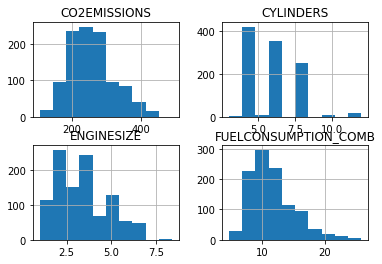

In [18]:
#plot each feature
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

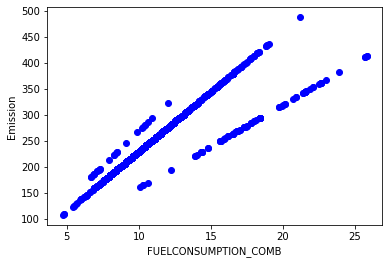

In [20]:
#scatter plot FUELCONSUMPTION_COMB vs CO2EMISSIONS
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Emission')
plt.show

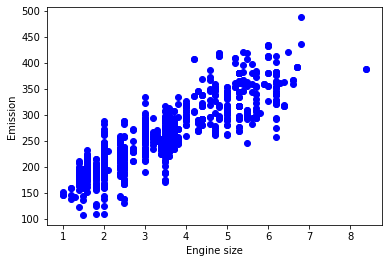

In [23]:
#plot ENGINESIZE vs CO2EMISSIONS
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

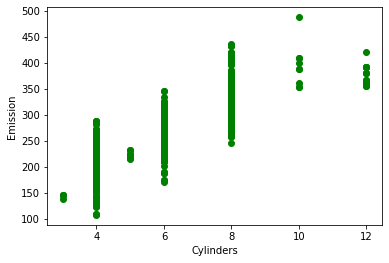

In [27]:
#plot CYLINDER vs the Emission
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='green')
plt.xlabel('Cylinders')
plt.ylabel('Emission')
plt.show()

In [28]:
#creating train and test data
#split dataset into train and test sets, 80% train and 20% test
msk = np.random.rand(len(df)) <0.8
train = cdf[msk]
test = cdf[~msk]

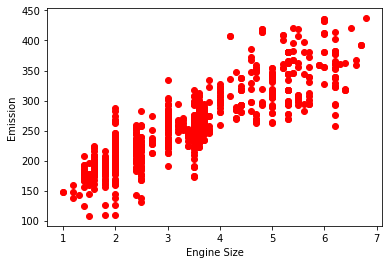

In [29]:
#plot the training data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [32]:
#model the data
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

#print coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)


Coefficients:  [[39.81658842]]
Intercept:  [122.86544531]


Text(0, 0.5, 'Emission')

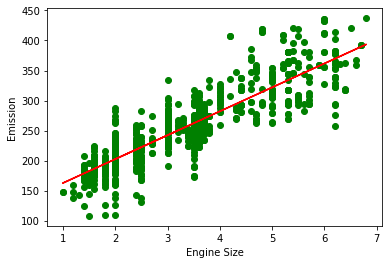

In [34]:
#plot outputs
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

In [37]:
regr.coef_

array([[39.81658842]])

In [38]:
regr.coef_[0]

array([39.81658842])

In [40]:
regr.coef_[0][0]

39.81658842211389

In [41]:
#evaluation of model
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 22.92
Residual sum of squares (MSE): 883.60
R2-score: 0.74


In [46]:
regr.predict(test_x)

array([[182.59032794],
       [262.22350479],
       [310.00341089],
       [202.49862215],
       [202.49862215],
       [242.31521057],
       [242.31521057],
       [242.31521057],
       [290.09511668],
       [290.09511668],
       [282.131799  ],
       [242.31521057],
       [242.31521057],
       [242.31521057],
       [242.31521057],
       [361.76497584],
       [202.49862215],
       [242.31521057],
       [202.49862215],
       [242.31521057],
       [298.05843437],
       [298.05843437],
       [202.49862215],
       [242.31521057],
       [298.05843437],
       [242.31521057],
       [242.31521057],
       [178.6086691 ],
       [178.6086691 ],
       [266.20516363],
       [218.42525752],
       [202.49862215],
       [266.20516363],
       [202.49862215],
       [242.31521057],
       [369.72829353],
       [369.72829353],
       [266.20516363],
       [178.6086691 ],
       [194.53530447],
       [178.6086691 ],
       [333.89336395],
       [333.89336395],
       [361